In [1]:
%pylab inline
import pandas as pd
import IGtools as igt
import networkx as nx
import os, sys 
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import igraph as igg

In [3]:
plt.style.use('fivethirtyeight')
def plot_results(x,data,norm=None,label=None,marker='s'):
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.gca()
    if norm==None:
        plt.errorbar(x, np.array(yy), np.array(std_yy), fmt=marker,ms=10,alpha=0.6, label=label);
    else:
        plt.errorbar(x, np.array(yy)/float(norm), np.array(std_yy)/float(norm), fmt=marker,ms=10,alpha=0.6, label=label);
    return;

In [4]:
from scipy.optimize import fsolve, fmin, root

In [5]:
fig = plt.figure()
widths = [0.3] * len(ass)
pos_offset = np.array(range(len(ass)))+0.3
ax = plt.gca()
blp1 = ax.boxplot(map(lambda x: res_ig[x], sorted(res_ig.keys())), positions=range(len(ass)), widths=widths,
           patch_artist=True,bootstrap=1000);
blp2 = ax.boxplot(map(lambda x: pred_data[x],sorted(res_ig.keys())), positions=pos_offset, widths=widths, 
           patch_artist=True,bootstrap=1000);
plt.ylim(0.2,1)
plt.grid('off')
ax.set_xticklabels(sorted(res_ig.keys()));

colors = ['red', 'orange']
for patch in blp1['boxes']:
        patch.set_facecolor(colors[0])
        patch.set_alpha(0.4)
for patch in blp2['boxes']:
        patch.set_facecolor(colors[1])
        patch.set_alpha(0.4)
plt.ylabel(r'$\rho_\alpha$', fontsize=20)
plt.xlabel(r'power law exponent $\eta$', fontsize=20)
plt.text(4.5, 0.32, r'Measured $\rho_\alpha$',
            bbox={'facecolor':colors[0], 'alpha':0.4, 'pad':2}, color='black', weight='roman',
            size='x-small')
plt.text(4.5, 0.25, r'Predicted $\rho_\alpha$',
            bbox={'facecolor':colors[1], 'alpha':0.4, 'pad':2}, color='black', weight='roman',
            size='x-small')
plt.tight_layout()
#plt.savefig('../../submission/si/plots/mis_powerlaw_approx.pdf')

NameError: name 'ass' is not defined

<Figure size 432x288 with 0 Axes>

# Gamma formalisms and simulations 

In [6]:
from scipy.stats import gamma 

In [7]:
from scipy.optimize import fsolve, fmin, root

def attempt_scipy_func2(x, alpha, beta, c):
    return np.abs(x - np.power(1 - (1/float((1-np.log(x)*beta)*x)) * np.power(1/float(1-beta*np.log(x)),alpha), c-1));


def minimize_gamma_pstar(xs, alpha, beta, c):
    vals = map(lambda x: attempt_scipy_func2(x, alpha, beta, c), xs);
    x0 = (np.min(vals), xs[np.nanargmin(vals)])
    return x0[1]

def rho_gamma(x,alpha,beta,c):
    ed01dp0 = (1 - ((alpha*beta)/(1-beta*np.log(x)))) * np.power(1/float(1-beta*np.log(x)),alpha);
    return (alpha*beta/float(c))  * (1 - np.power(x,c/float(c-1))) + (ed01dp0);


## variable $\alpha$ 

/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/envs/py2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


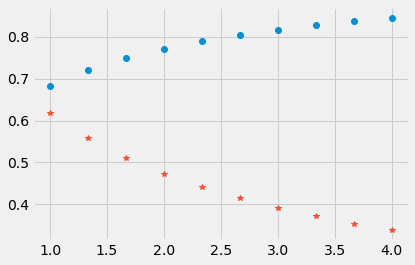

In [8]:
alphas = np.linspace(1,4,10)
beta = 3
xs = np.linspace(0,1,10000)
pstars = map(lambda x: minimize_gamma_pstar(xs,x,beta,2), alphas)
plt.plot(alphas, pstars ,'o')
plt.plot(alphas, map(lambda x: rho_gamma(pstars[x],alphas[x],beta,2), range(len(alphas))),'*')


In [ ]:
import time 
num_iter = 20
N = 70;
beta = 3;
gamma_res_ig = {}
for alpha in alphas:
    now = time.time()
    gamma_res_ig[alpha] = []
    for it in range(num_iter):
        degs  =  map(int,gamma.rvs(alpha,loc=0,scale=beta,size=N))
        if np.sum(degs)%2==1:
            degs[0]+=1;
        g = nx.configuration_model(degs);
        nx.write_gml(g,'test.gml');
        g_igraph = igg.load('test.gml')
        gamma_res_ig[alpha].append( g_igraph.alpha() / float(N) )  
        #gamma_res_ig[alpha].append( len(nx.maximal_independent_set(g)) / float(N) )  
    print alpha, time.time() - now

1.0 0.775969028473
1.3333333333333333 3.4822769165
1.6666666666666665 13.9751870632


In [ ]:
plt.style.use('seaborn-white')
plt.box('off')
plt.errorbar(alphas, map(lambda x: np.mean(gamma_res_ig[x]), alphas),map(lambda x: np.std(gamma_res_ig[x]), alphas),
             fmt='ro', alpha=.7)
plt.plot(alphas, map(lambda x: rho_gamma(pstars[x],alphas[x],beta,2), range(len(alphas))),'k--')
plt.xlabel(r'$\gamma$', fontsize=30)
plt.ylabel(r'$\rho_\alpha$', fontsize=30)
plt.ylim(0,1)
plt.tight_layout()
#plt.savefig('rho_alpha_for_gamma_distribution_beta_'+str(beta)+'.pdf')


## variable $\beta$

In [ ]:
betas = np.linspace(1,10,10)
N = 50;
alphas = [2.5]

xs = np.linspace(0,1,10000)
pstars = map(lambda x: minimize_gamma_pstar(xs,alphas[0],x,2), betas)
plt.plot(betas, pstars ,'o')
plt.plot(betas, map(lambda x: rho_gamma(pstars[x],alphas[0], betas[x],2), range(len(betas))),'*')


In [ ]:
import time 
num_iter = 20
N = 70;
gamma_res_ig = {}
for beta in betas:
    now = time.time()
    gamma_res_ig[beta] = []
    for it in range(num_iter):
        degs  =  map(int,gamma.rvs(alphas[0],loc=0,scale=beta,size=N))
        if np.sum(degs)%2==1:
            degs[0]+=1;
        g = nx.configuration_model(degs);
        nx.write_gml(g,'test.gml');
        g_igraph = igg.load('test.gml')
        gamma_res_ig[beta].append( g_igraph.alpha() / float(N) )  
        #gamma_res_ig[alpha].append( len(nx.maximal_independent_set(g)) / float(N) )  
    print beta, time.time() - now

In [ ]:
plt.style.use('seaborn-white')
plt.box('off')
plt.errorbar(betas, map(lambda x: np.mean(gamma_res_ig[x]), betas),map(lambda x: np.std(gamma_res_ig[x]), betas),
             fmt='ro', alpha=.7)
plt.plot(betas, map(lambda x: rho_gamma(pstars[x],alphas[0],betas[x],2), range(len(betas))),'k--')
plt.xlabel(r'$\beta$', fontsize=30)
plt.ylabel(r'$\rho_\alpha$', fontsize=30)
plt.ylim(0,1)
plt.tight_layout()
#plt.savefig('rho_alpha_for_gamma_distribution_beta_50.pdf')


## $\alpha, \beta$ phasespace

In [111]:
target_k = np.linspace(1.5,20,30);

alphas = np.linspace(0.5,4,5)
xs = np.linspace(0,1,2000)
zeta_alpha_pstars = pd.DataFrame(columns=target_k, index=alphas);
zeta_alpha_rhos = pd.DataFrame(columns=target_k, index=alphas);
for k in target_k:
    now = time.time()
    deh = pd.Series(index=alphas);
    dehrhos = pd.Series(index=alphas);
    for alpha in alphas:
        beta = k/alpha
        deh[alpha] = minimize_gamma_pstar(xs,alpha,beta,2);
        dehrhos[alpha] = rho_gamma(deh[alpha],alpha,beta,2);
    zeta_alpha_pstars[k] = deh;
    zeta_alpha_rhos[k] = dehrhos;
    print k, time.time() - now

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


1.5 0.199506044388
2.13793103448 0.198421955109
2.77586206897 0.197839021683
3.41379310345 0.198543071747
4.05172413793 0.199353933334
4.68965517241 0.198522090912
5.3275862069 0.202363967896
5.96551724138 0.196419000626
6.60344827586 0.197901010513
7.24137931034 0.199312210083
7.87931034483 0.198537826538
8.51724137931 0.199583053589
9.15517241379 0.198879003525
9.79310344828 0.199350118637
10.4310344828 0.198575019836
11.0689655172 0.198297977448
11.7068965517 0.198876142502
12.3448275862 0.198323965073
12.9827586207 0.197797060013
13.6206896552 0.197549104691
14.2586206897 0.195067882538
14.8965517241 0.200313091278
15.5344827586 0.200026035309
16.1724137931 0.199392080307
16.8103448276 0.198481798172
17.4482758621 0.198414087296
18.0862068966 0.198674917221
18.724137931 0.196735858917
19.3620689655 0.198490142822
20.0 0.196799039841


In [115]:
real_zeta_alpha_rhos = pd.DataFrame(columns=target_k,index=alphas);
N = 50;
num_iter = 10
for k in target_k:
    now = time.time()
    deh = pd.Series(index=alphas)
    for alpha in alphas:
        dentro = []
        beta = k/alpha
        for it in range(num_iter):
            degs  =  map(int,gamma.rvs(alpha,loc=0,scale=beta,size=N))
            if np.sum(degs)%2==1:
                degs[0]+=1;
            g = nx.configuration_model(degs);
            nx.write_gml(g,'test.gml');
            g_igraph = igg.load('test.gml')
            dentro.append( g_igraph.alpha() / float(N) )
        deh[alpha] = np.mean(dentro)
    real_zeta_alpha_rhos[k] = deh;
    print k, time.time() - now

1.5 0.313606023788
2.13793103448 0.687654972076
2.77586206897 1.14292597771
3.41379310345 1.12492895126
4.05172413793 1.20943212509
4.68965517241 1.50093889236
5.3275862069 1.35324192047
5.96551724138 1.45263314247
6.60344827586 1.63635516167
7.24137931034 1.49514007568
7.87931034483 1.5676150322
8.51724137931 1.67981004715
9.15517241379 1.52636599541
9.79310344828 1.47646617889
10.4310344828 1.84617495537
11.0689655172 1.65789818764
11.7068965517 1.64815998077
12.3448275862 1.65948605537
12.9827586207 1.61336183548
13.6206896552 1.58230185509
14.2586206897 1.50349402428
14.8965517241 1.53844690323
15.5344827586 1.50793600082
16.1724137931 1.62853693962
16.8103448276 1.57320308685
17.4482758621 1.58680605888
18.0862068966 1.53417015076
18.724137931 1.52841091156
19.3620689655 1.73537492752
20.0 1.59539890289


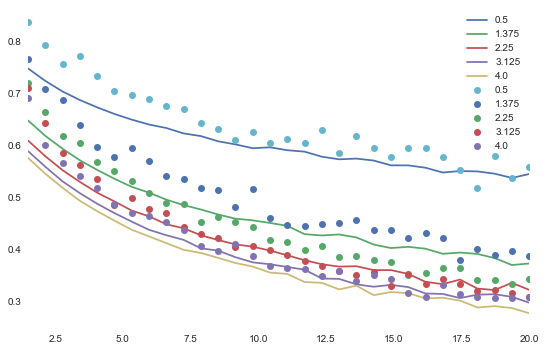

In [127]:
fig = plt.figure()
ax = plt.gca()
plt.style.use('seaborn-white')
plt.grid('off')
plt.box('off')
zeta_alpha_rhos.T.plot(ax=ax)
real_zeta_alpha_rhos.T.plot(style='o', ax=ax)

# Pareto 

In [6]:
from scipy.optimize import fsolve, fmin, root
from scipy.special import gammaincc, gammainc, gamma
import mpmath


def pareto_M(t, alpha, xm):
    return alpha * ((-xm*t)**alpha) * float(mpmath.gammainc(-alpha,-xm*t));

def pareto_devM(t, alpha , xm):
    firstterm =  - (alpha**2) * (xm**alpha) * float(mpmath.gammainc(-alpha,-xm*t)) * ((-t)**(alpha-1))
    secondterm = - (alpha/t) * np.exp(xm*t);
    return firstterm + secondterm;

def pareto_M_minus_devM(t, alpha, xm):
    firstterm = alpha * (xm**alpha) * float(mpmath.gammainc(-alpha,-xm*t)) * ((-t)**alpha + alpha * (-t)**(alpha-1))
    secondterm = (alpha/t) * np.exp(xm*t);
    return firstterm + secondterm
                                            

def attempt_scipy_func3(x, alpha, xm, c):
    d = alpha*xm/(alpha-1)
    return np.abs(x - np.power(1 - (1/float(d*x) * pareto_devM(np.log(x), alpha, xm)) , c-1));


def minimize_pareto_pstar(xs, alpha, xm, c):
    vals = map(lambda x: attempt_scipy_func3(x, alpha, xm, c), xs);
    x0 = (np.min(vals), xs[np.nanargmin(vals)])
    return x0[1]

def rho_pareto(x,alpha,xm,c,d=None):
    t = np.log(x)
    if d == None:
        d = alpha*xm/(alpha-1)
    else:
        xm = d*(alpha-1)/float(alpha)
        d =  alpha*xm/(alpha-1);
    ed01dp0 = alpha * np.power(-xm*t, alpha) * float(mpmath.gammainc(-alpha, -xm*t)) * (1 - alpha/t) + (alpha/t)*(x**xm); 
    return (d/float(c))  * (1 - np.power(x,c/float(c-1))) + (ed01dp0);


## variable $\alpha$

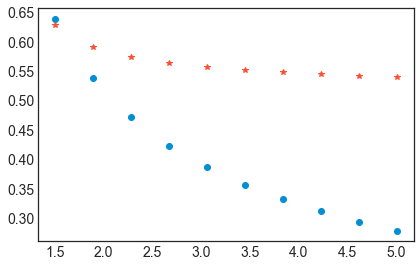

In [61]:
betas = [50]
N = 50;
alphas = np.linspace(1.5,5,10)

xm = 1;
xs = np.linspace(0.000001,0.99999,3000)
pstars = map(lambda x: minimize_pareto_pstar(xs,x,xm,2), alphas)
plt.plot(alphas, pstars ,'o')
plt.plot(alphas, map(lambda x: rho_pareto(pstars[x],alphas[x],xm,2), range(len(alphas))),'*')


In [62]:
import time 
#import igraph as igg
from scipy.stats import pareto
num_iter = 10
N = 200;
pareto_res_ig = {}
av_deg_ig = {}
for alpha in alphas:
    now = time.time()
    pareto_res_ig[alpha] = []
    av_deg_ig[alpha] = []
    for it in range(num_iter):
        degs  =  map(lambda x: int(round(x)),pareto.rvs(alpha,scale=xm,size=N))
        if np.sum(degs)%2==1:
            degs[0]+=1;
        g = nx.configuration_model(degs);
        av_deg_ig[alpha].append(np.mean(g.degree().values()));
#        nx.write_gml(g,'test.gml');
#        g_igraph = igg.load('test.gml')
#        pareto_res_ig[alpha].append( g_igraph.alpha() / float(N) )  
        pareto_res_ig[alpha].append(len(nx.maximal_independent_set(g)) / float(N))
    print alpha, time.time() - now

1.5 0.043377161026
1.88888888889 0.0332441329956
2.27777777778 0.034521818161
2.66666666667 0.0341320037842
3.05555555556 0.0320591926575
3.44444444444 0.0298371315002
3.83333333333 0.0361051559448
4.22222222222 0.0388538837433
4.61111111111 0.0315928459167
5.0 0.0282809734344


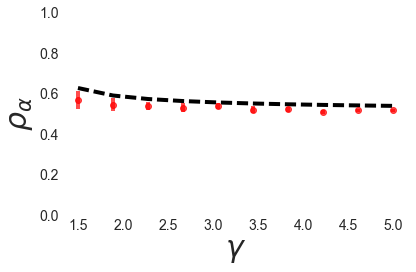

In [65]:

plt.errorbar(alphas, map(lambda x: np.mean(pareto_res_ig[x]), alphas),
             map(lambda x: np.std(pareto_res_ig[x]), alphas),fmt='or',alpha=.7)
plt.plot(alphas, map(lambda x: rho_pareto(pstars[x],alphas[x],xm,2), range(len(alphas))),'k--')
plt.xlabel(r'$\gamma$', fontsize=30)
plt.ylabel(r'$\rho_\alpha$', fontsize=30)
plt.ylim(0,1)
plt.box('off') 
plt.tight_layout()

plt.savefig('../../submission/si/plots/rho_alpha_for_pareto_distribution_xm_1.pdf')

## variable $x_m$

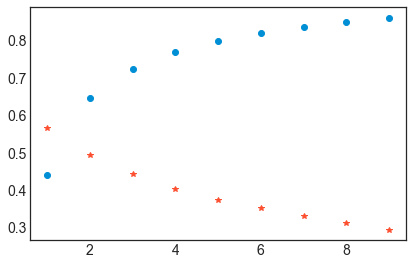

In [81]:
alphas = np.linspace(1.5,5,10)
xs = np.linspace(0.000001,0.99999,3000)
xms = range(1,10)
pstars = map(lambda x: minimize_pareto_pstar(xs,2.5,x,2),xms)
plt.plot(xms, pstars ,'o')
plt.plot(xms, map(lambda x: rho_pareto(pstars[x],2.5,xms[x],2), range(len(xms))),'*')


In [85]:
import time 
#import igraph as igg
from scipy.stats import pareto
num_iter = 10
N = 400;
pareto_res_ig = {}
av_deg_ig = {}
xms = range(1,10)
alpha = 2.5
for xm in xms:
    now = time.time()
    pareto_res_ig[xm] = []
    av_deg_ig[xm] = []
    for it in range(num_iter):
        degs  =  map(lambda x: int(round(x)),pareto.rvs(alpha,scale=xm,size=N))
        if np.sum(degs)%2==1:
            degs[0]+=1;
        g = nx.configuration_model(degs);
        av_deg_ig[xm].append(np.mean(g.degree().values()));
#        nx.write_gml(g,'test.gml');
#        g_igraph = igg.load('test.gml')
#        pareto_res_ig[alpha].append( g_igraph.alpha() / float(N) )  
        pareto_res_ig[xm].append(len(nx.maximal_independent_set(g)) / float(N))
    print alpha, time.time() - now

2.5 0.0691950321198
2.5 0.0790860652924
2.5 0.0978870391846
2.5 0.143074989319
2.5 0.134545087814
2.5 0.276454925537
2.5 0.162523984909
2.5 0.320333003998
2.5 0.306751012802


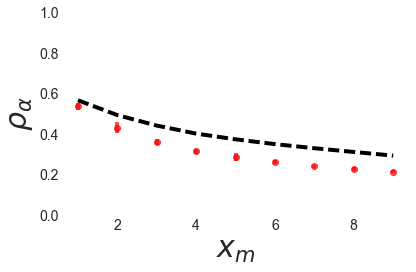

In [86]:
plt.errorbar(xms, map(lambda x: np.mean(pareto_res_ig[x]), xms),map(lambda x: np.std(pareto_res_ig[x]), xms),fmt='or',alpha=.7)
plt.plot(xms, map(lambda x: rho_pareto(pstars[x],2.5,xms[x],2), range(len(xms))),'--k')
plt.ylim(0,1)
plt.xlabel(r'$x_m$', fontsize=30)
plt.ylabel(r'$\rho_\alpha$', fontsize=30)
plt.ylim(0,1)
plt.box('off')
plt.tight_layout()
plt.savefig('../../submission/si/plots/rho_alpha_for_pareto_distribution_alpha_2_5.pdf')

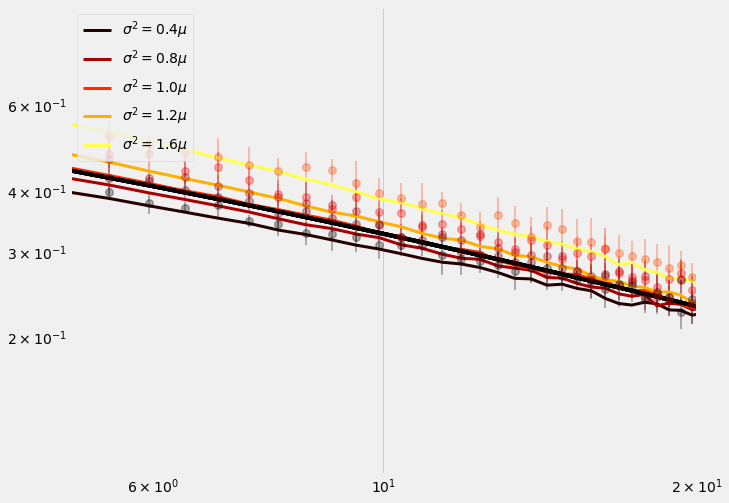

In [33]:
fig = plt.figure(figsize=(10,8))
for i, n_sigma in enumerate(sorted(res_ig.keys())[1::]):
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    data = res_ig[n_sigma]
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    x_p = range(k_min,k_max,1);
    plt.plot(x_p,rhos,'-k')
    plt.errorbar(pss,yy,std_yy, ms=15,alpha=0.3,color=cmap(i*150/len(sorted(res_ig.keys())[1::])),fmt='.',lw=2,mew=1.5)#,label = n_sigma)
    plt.plot(pss, preds_df[n_sigma],'-',color=cmap(10+i*150/len(sorted(res_ig.keys())[1::2])),
             label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',lw=3)
    plt.legend(loc=2)
plt.xlim(5,20)
plt.yscale('log')
plt.xscale('log')


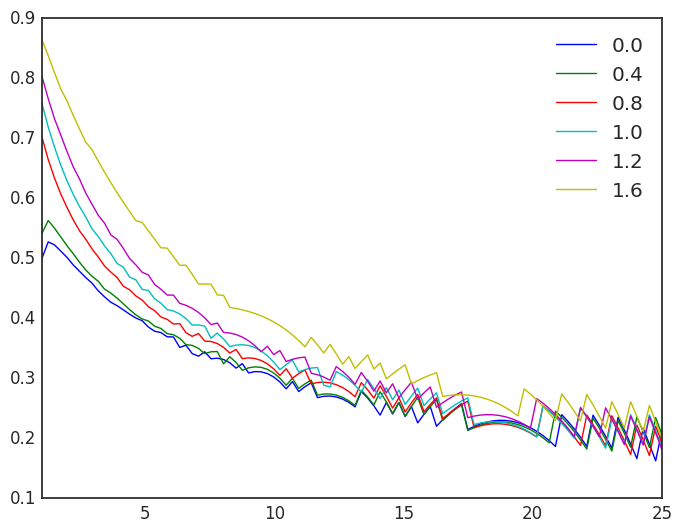

In [231]:
preds_df.plot()

In [243]:
res_ig_df = {}
for k in sorted(res_ig.keys()):
    res_ig_df[k] = {}
    for p in sorted(res_ig[k].keys()):
        res_ig_df[k][p] = np.nanmean(res_ig[k][p])
res_ig_df = pd.DataFrame(res_ig_df)
res_ig_df.head()

,0.0,0.4,0.8,1.0,1.2,1.6
1.000000,0.5,0.754,0.768,0.768,0.790,0.786
1.242424,0.5,0.652,0.724,0.746,0.744,0.736
1.484848,0.5,0.626,0.700,0.716,0.700,0.730
1.727273,0.5,0.596,0.658,0.680,0.692,0.714
1.969697,0.5,0.572,0.622,0.640,0.664,0.698


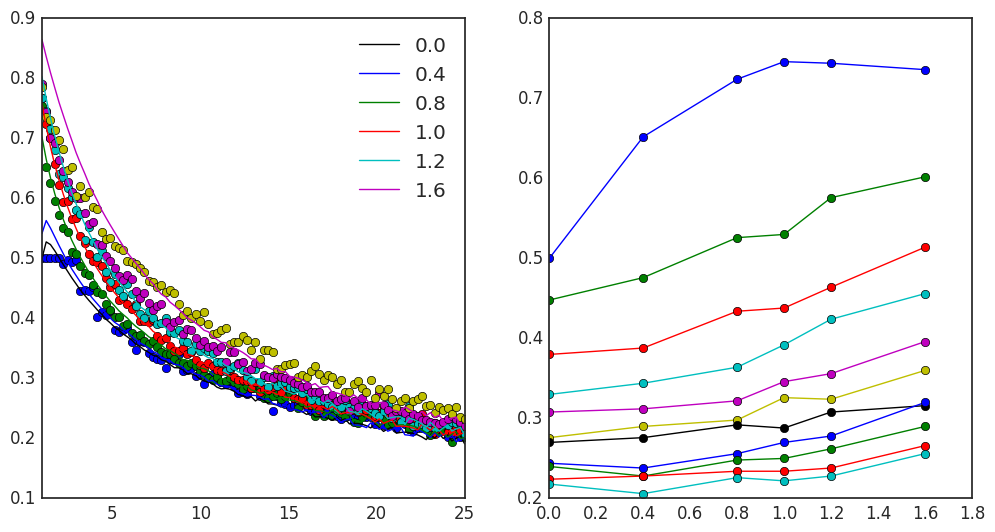

In [246]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
for c in res_ig_df.columns:
    plt.plot(res_ig_df[c],'o')
preds_df.plot(ax=ax)
ax = plt.subplot(122)
for c in res_ig_df.T.columns[1::9]:
    plt.plot(res_ig_df.T[c],'o-')
#preds_df.T[pss[1::7]].plot(ax=ax)

In [57]:
# define the colormap
cmap = plt.cm.hot
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

In [292]:
n_sigmas_redux = sorted(res_ig.keys()[1::])
preds = {}
for i, n_sigma in enumerate(n_sigmas_redux):
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    preds[n_sigma] = gaussian_prediction(pss, sigmas,xs=np.linspace(0,1,5000));

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


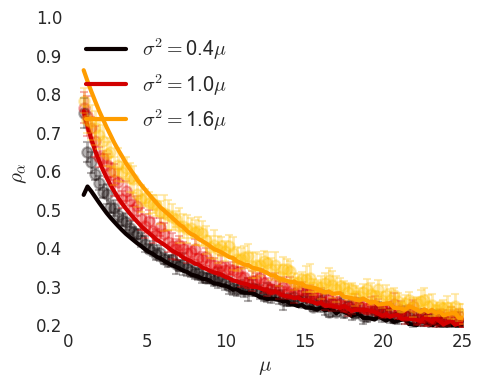

In [298]:
fs = 15
sigmas = {}
fig = plt.figure(figsize=(5,4))
for i, n_sigma in enumerate(sorted(res_ig.keys())[1::2]):
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    data = res_ig[n_sigma]
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.errorbar(pss,yy,std_yy, ms=15,alpha=0.3,color=cmap(i*250/len(sorted(res_ig.keys())[1::2])),fmt='.',lw=2,mew=1.5)#,label = n_sigma)
    plt.plot(pss, preds[n_sigma],'-',color=cmap(i*230/len(sorted(res_ig.keys())[1::2])),
             label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',lw=3)
    plt.legend(loc=2)
#x_p = range(k_min,k_max,1);
#plt.plot(x_p,rhos,'--k',lw=3)
#plt.xlim(1,20)
plt.ylim(0.2,1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\mu$', fontsize=fs)
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.box('off')
plt.tight_layout()
plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects.pdf')
plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects.eps')
plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects.svg')

## Heterogeneity simulations 

In [193]:
num_iter = 10;
N = 75;

het_res_ig = {};
het_av_k_ig = {}
het_n_ig_dict = {}
import time
from datetime import datetime

import igraph as igg

from scipy.stats import norm
het_sigma = np.linspace(0.2,1.4,10)

for p in [15,20,25,30,35]:
    print p;
    het_res_ig[p] = {};
    het_av_k_ig[p] = {};
    het_n_ig_dict[p] = {};

    for l,sig in enumerate(het_sigma):
        print l, '/', len(het_sigma), ':', sig, 'started:', str(datetime.now())
        het_res_ig[p][sig] = []
        het_av_k_ig[p][sig] = [];
        het_n_ig_dict[p][sig] = []
        for it in range(num_iter):
            deg = map(lambda x: np.max([0, int(x)]), norm.rvs(p,sig*np.sqrt(p),N));
            if not np.sum(deg)%2==0:
                deg[0]+=1;
            g = nx.configuration_model(deg)
            het_av_k_ig[p][sig].append(np.mean(g.degree().values()));
            n_g = g.number_of_nodes()
            het_n_ig_dict[p][sig].append(n_g);
            nx.write_gml(g,'test.gml');
            g_igraph = igg.load('test.gml')
            het_res_ig[p][sig].append( g_igraph.alpha() / float(n_g) )  


15
0 / 10 : 0.2 started: 2017-01-03 12:31:04.712878
1 / 10 : 0.333333333333 started: 2017-01-03 12:31:32.814527
2 / 10 : 0.466666666667 started: 2017-01-03 12:32:04.553714
3 / 10 : 0.6 started: 2017-01-03 12:32:35.929336
4 / 10 : 0.733333333333 started: 2017-01-03 12:33:01.520248
5 / 10 : 0.866666666667 started: 2017-01-03 12:33:30.092516
6 / 10 : 1.0 started: 2017-01-03 12:34:05.517751
7 / 10 : 1.13333333333 started: 2017-01-03 12:34:29.193030
8 / 10 : 1.26666666667 started: 2017-01-03 12:34:54.818381
9 / 10 : 1.4 started: 2017-01-03 12:35:17.172194
20
0 / 10 : 0.2 started: 2017-01-03 12:35:37.700652
1 / 10 : 0.333333333333 started: 2017-01-03 12:35:53.035021
2 / 10 : 0.466666666667 started: 2017-01-03 12:36:03.415551
3 / 10 : 0.6 started: 2017-01-03 12:36:16.432718
4 / 10 : 0.733333333333 started: 2017-01-03 12:36:28.812948
5 / 10 : 0.866666666667 started: 2017-01-03 12:36:41.435834
6 / 10 : 1.0 started: 2017-01-03 12:36:53.559934
7 / 10 : 1.13333333333 started: 2017-01-03 12:37:03.9

In [208]:
preds_het = {}
for sig in het_sigma:
    preds_het[sig] = []
    sigmas = map(lambda x: np.sqrt(x)*sig, sorted(het_res_ig.keys()));
    preds_het[sig] = pd.Series(gaussian_prediction(sorted(het_res_ig.keys()), sigmas, xs=np.linspace(0,1,10000)), index=sorted(het_res_ig.keys()));

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars


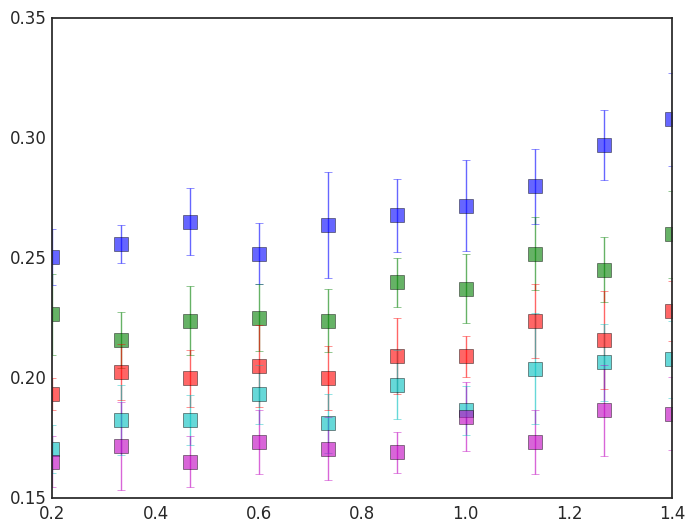

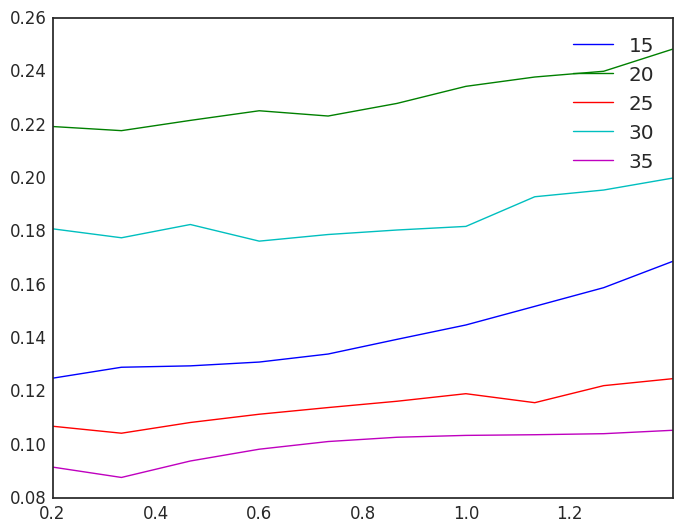

In [209]:
for p in sorted(het_res_ig.keys()):
    plot_results(het_sigma, het_res_ig[p],label = p)

preds_het_df = pd.DataFrame(preds_het).T
preds_het_df.plot()
#plt.plot(het_sigma,preds_het,label=p)
#plt.legend(loc=0)
#plt.ylim(0,0.7)
#plt.tight_layout()

# Simulation-driven comparison with IG 

In [247]:
num_iter = 10;
nN = 20;

new_res_ig = {};
new_av_k_ig = {}
new_n_ig_dict = {}
new_gauss_pred = {}

import time
from datetime import datetime

import igraph as igg
new_k_min = 1
new_k_max = 15
new_pmin = new_k_min/float(nN);
new_pmax = new_k_max/float(nN);
precision = 30
new_ps = np.linspace(new_pmin,new_pmax,precision);

from scipy.stats import norm
#rvs(loc=0, scale=1, size=1, random_state=None)

for l,p in enumerate(new_ps):
    print l, '/', precision, ':', p, 'started:', str(datetime.now())
    new_gauss_pred[p] = []
    new_res_ig[p] = []
    new_av_k_ig[p] = [];
    new_n_ig_dict[p] = []
    for it in range(num_iter):
        g = igt.create_ER_bipartite_graph(nN,p)
        lg = igt.line_graph(g)
        ig = igt.interference_graph(lg)
        new_av_k_ig[p].append(np.mean(ig.degree().values()));
        new_n_ig = ig.number_of_nodes()
        new_n_ig_dict[p].append(new_n_ig);
        nx.write_gml(ig,'test.gml');
        g_igraph = igg.load('test.gml')
        new_res_ig[p].append( g_igraph.alpha() )    
        mu = np.mean(g.degree().values());
        sigma =  np.std(g.degree().values());
        p_stars_gauss = minimize_gauss_pstar(xs,mu,sigma**2, 2);
        new_gauss_pred[p].append(rho_gauss(p_stars_gauss, mu , sigma**2,2));

0 / 30 : 0.05 started: 2017-01-03 14:36:20.729498


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


1 / 30 : 0.0741379310345 started: 2017-01-03 14:36:22.984722
2 / 30 : 0.098275862069 started: 2017-01-03 14:36:25.244776
3 / 30 : 0.122413793103 started: 2017-01-03 14:36:28.016182
4 / 30 : 0.146551724138 started: 2017-01-03 14:36:32.569647
5 / 30 : 0.170689655172 started: 2017-01-03 14:36:37.029337
6 / 30 : 0.194827586207 started: 2017-01-03 14:36:42.531752
7 / 30 : 0.218965517241 started: 2017-01-03 14:36:50.802238
8 / 30 : 0.243103448276 started: 2017-01-03 14:36:59.945746
9 / 30 : 0.26724137931 started: 2017-01-03 14:37:14.115511
10 / 30 : 0.291379310345 started: 2017-01-03 14:37:28.827588
11 / 30 : 0.315517241379 started: 2017-01-03 14:37:48.505824
12 / 30 : 0.339655172414 started: 2017-01-03 14:38:10.501523
13 / 30 : 0.363793103448 started: 2017-01-03 14:38:35.674275
14 / 30 : 0.387931034483 started: 2017-01-03 14:39:03.855833
15 / 30 : 0.412068965517 started: 2017-01-03 14:39:31.682141
16 / 30 : 0.436206896552 started: 2017-01-03 14:40:03.840655


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


17 / 30 : 0.460344827586 started: 2017-01-03 14:40:38.266062
18 / 30 : 0.484482758621 started: 2017-01-03 14:41:12.914323
19 / 30 : 0.508620689655 started: 2017-01-03 14:41:47.641904
20 / 30 : 0.53275862069 started: 2017-01-03 14:42:24.294404
21 / 30 : 0.556896551724 started: 2017-01-03 14:43:01.746232
22 / 30 : 0.581034482759 started: 2017-01-03 14:43:41.856792
23 / 30 : 0.605172413793 started: 2017-01-03 14:44:20.625068
24 / 30 : 0.629310344828 started: 2017-01-03 14:44:59.623761
25 / 30 : 0.653448275862 started: 2017-01-03 14:45:39.306339
26 / 30 : 0.677586206897 started: 2017-01-03 14:46:18.520535
27 / 30 : 0.701724137931 started: 2017-01-03 14:46:57.476457
28 / 30 : 0.725862068966 started: 2017-01-03 14:47:38.210888
29 / 30 : 0.75 started: 2017-01-03 14:48:18.946607


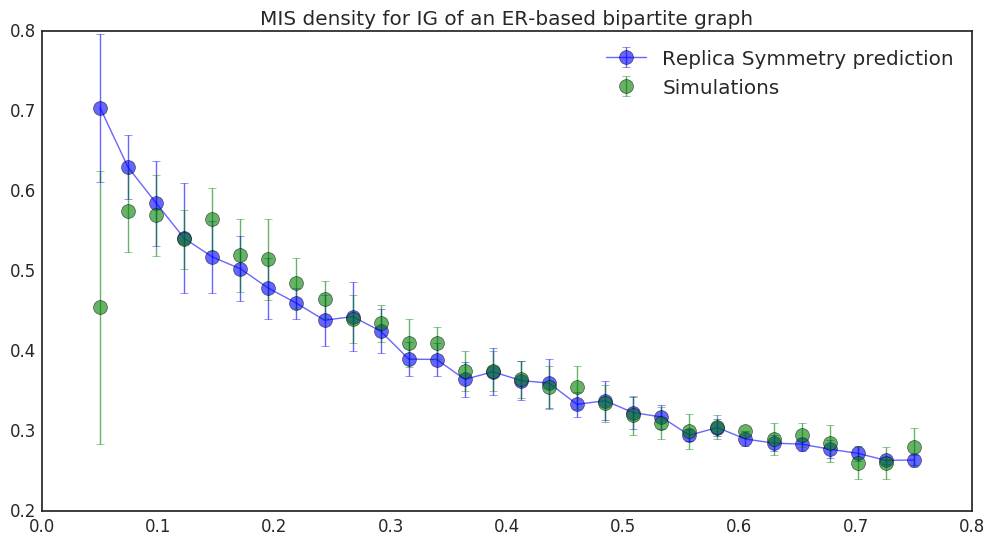

In [249]:
fig = plt.figure(figsize=(12,6))
plot_results(new_ps,new_gauss_pred,norm=1,marker='-o', label='Replica Symmetry prediction')
plot_results(new_ps,new_res_ig,norm=nN, marker='o',label='Simulations')
plt.title('MIS density for IG of an ER-based bipartite graph')
plt.legend(loc=0)

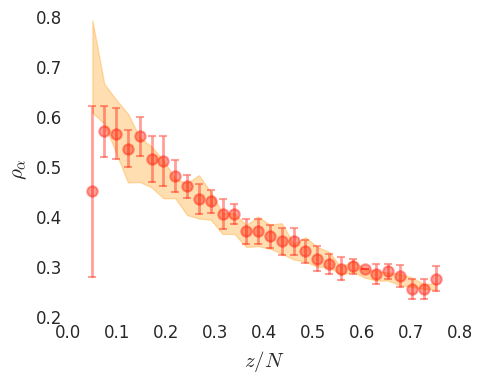

In [312]:
fs = 15
fig = plt.figure(figsize=(8,4))
data = new_gauss_pred
yy = np.array(map(lambda x: np.mean(data[x]), sorted(data.keys())));
std_yy = np.array(map(lambda x: np.std(data[x]), sorted(data.keys())));
plt.fill_between(new_ps,yy+std_yy,yy-std_yy, alpha=0.3,color=cmap(150))

data = new_res_ig
yy = map(lambda x: np.mean(data[x])/nN, sorted(data.keys()));
std_yy = map(lambda x: np.std(data[x])/nN, sorted(data.keys()));
plt.errorbar(new_ps,yy,std_yy, ms=15,alpha=0.4,color=cmap(100),fmt='.',lw=2,mew=1.5)#,label = n_sigma)
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.xlabel(r'$z/N$', fontsize=fs)
plt.box('off')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.eps')
plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.pdf')
plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.png')
plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.svg')

In [1]:
fs = 15
fig = plt.figure(figsize=(5,4))
data = new_gauss_pred
yy = np.array(map(lambda x: np.mean(data[x]), sorted(data.keys())));
std_yy = np.array(map(lambda x: np.std(data[x]), sorted(data.keys())));
plt.fill_between(new_ps,yy+std_yy,yy-std_yy, alpha=0.3,color=cmap(150))

data = new_res_ig
yy = map(lambda x: np.mean(data[x])/nN, sorted(data.keys()));
std_yy = map(lambda x: np.std(data[x])/nN, sorted(data.keys()));
plt.errorbar(new_ps,yy,std_yy, ms=15,alpha=0.4,color=cmap(100),fmt='.',lw=2,mew=1.5)#,label = n_sigma)
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.xlabel(r'$z/N$', fontsize=fs)
plt.box('off')
plt.legend(loc=0)
plt.tight_layout()


NameError: name 'plt' is not defined

## Probability of performing $\beta$ tasks from a task set of dimension $\gamma$

$p(\beta ; \gamma) = \binom{\gamma}{\beta} \frac{M_{out}!}{(M_{out} - M_{in})!} M^{-M_{in}} M^{-(\gamma-\beta)} 
\frac{M_{in}! z^{\gamma-\beta}}{(M_{in} - (\gamma-\beta)!}$

In [318]:
from scipy.special import binom
def log_prob_beta_gamma(beta, gamma, M, zeta):
    s = 0; 
    Min = zeta*beta;
    Mout = M - zeta*beta;
    s += np.log(binom(gamma,beta))
    s += np.sum(map(np.log, range(1,Mout +1 ))) #the plus one is for the range function only, not in the math
    s -= np.sum(map(np.log, range(1,Mout - Min +1 )))
    s -= Min * np.log(M);
    s -= (gamma - beta) * np.log(M/float(zeta));
    s += np.sum(map(np.log, range(1, Min +1)))
    s -= np.sum(map(np.log, range(1, Min -(gamma-beta) +1)))
    return s;
    
def average_beta_gamma(gamma, M, zeta):
    probs = map(lambda x: np.exp(log_prob_beta_gamma(x,gamma, M, zeta)), range(1,gamma+1));
    Z_fun = np.sum(probs);
    s = 0;
    for i, beta in enumerate(range(1,gamma+1)):
        s += beta * probs[i] / Z_fun;
    return s;